In [2]:
import pandas as pd
mod=pd.read_csv('mod.csv')
mos=pd.read_csv('mosiac.csv')
pav=pd.read_csv('pavement.csv')

In [3]:
pav.head(4)

,slno,gx,gy,gz,ax,ay,az,Unnamed: 7,
0,1,0.000000,0.000000,0.297710,0.000000,0.000000,0.000000,NaN,NaN
1,2,24.106870,14.183206,-15.053435,-1.280029,-0.360352,-0.566895,NaN,NaN
2,3,0.580153,3.862595,1.068702,-0.280029,-0.268311,-0.601318,NaN,NaN
3,4,-6.908397,-6.549618,-15.473282,2.000000,-0.548096,0.698975,NaN,NaN


In [4]:
pav=pav.iloc[:,:-2]

In [5]:
len(pav)

1032

In [6]:
pav.head()

,slno,gx,gy,gz,ax,ay,az
0,1,0.000000,0.000000,0.297710,0.000000,0.000000,0.000000
1,2,24.106870,14.183206,-15.053435,-1.280029,-0.360352,-0.566895
2,3,0.580153,3.862595,1.068702,-0.280029,-0.268311,-0.601318
3,4,-6.908397,-6.549618,-15.473282,2.000000,-0.548096,0.698975
4,5,6.694656,-5.572519,4.015267,-0.899170,-0.072754,-0.063477


In [7]:
mos=mos.iloc[:,:-2]
mos.head()

,slno,gx,gy,gz,ax,ay,az
0,1,-0.167939,0.206107,0.206107,-0.899902,-0.270264,0.209961
1,2,-0.122137,0.274809,-1.160305,-0.774170,-0.340576,-0.606445
2,3,0.015267,3.694656,-0.236641,-0.740967,-0.144775,0.436035
3,4,3.053435,1.526718,-0.847328,-0.480225,-0.586914,0.008057
4,5,0.175573,-0.435115,0.038168,-0.952637,-0.051025,-0.088867


In [8]:
pav.head()


,slno,gx,gy,gz,ax,ay,az
0,1,0.000000,0.000000,0.297710,0.000000,0.000000,0.000000
1,2,24.106870,14.183206,-15.053435,-1.280029,-0.360352,-0.566895
2,3,0.580153,3.862595,1.068702,-0.280029,-0.268311,-0.601318
3,4,-6.908397,-6.549618,-15.473282,2.000000,-0.548096,0.698975
4,5,6.694656,-5.572519,4.015267,-0.899170,-0.072754,-0.063477


In [9]:
mod.head(4)

,slno,gx,gy,gz,ax,ay,az
0,1,-2.854962,3.030534,10.923664,-0.952393,-0.872803,0.153564
1,2,-3.656489,-11.534351,7.038168,0.137695,0.007812,0.089111
2,3,1.526718,1.511450,0.603053,0.109375,-1.375000,-1.187988
3,4,-0.488550,16.801527,-23.007634,-0.055420,-0.681152,-0.004150


In [10]:
l1=list()
for i in range(len(mod)):
    l1.append('moderate')

In [11]:
mod['floor']=l1

In [12]:
l2=list()
for i in range(len(mos)):
    l2.append('mosiac')
mos['floor']=l2

In [13]:
l3=list()
for i in range(len(pav)):
    l3.append('pavement')
pav['floor']=l3

In [14]:
pav.head(2)

,slno,gx,gy,gz,ax,ay,az,floor
0,1,0.00000,0.000000,0.297710,0.000000,0.000000,0.000000,pavement
1,2,24.10687,14.183206,-15.053435,-1.280029,-0.360352,-0.566895,pavement


In [15]:
mod=mod.iloc[:,1:]
mos=mos.iloc[:,1:]
pav=pav.iloc[:,1:]

In [16]:
pav.columns=['gx','gy','gz','ax','ay','az','floor']
mos.columns=['gx','gy','gz','ax','ay','az','floor']

In [17]:
data1=pd.concat([pav,mos],ignore_index=True)

In [18]:
dataset=pd.concat([mod,data1],ignore_index=True)

In [19]:
dataset.head(2)

,gx,gy,gz,ax,ay,az,floor
0,-2.854962,3.030534,10.923664,-0.952393,-0.872803,0.153564,moderate
1,-3.656489,-11.534351,7.038168,0.137695,0.007812,0.089111,moderate


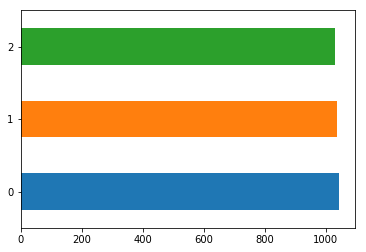

In [57]:
pd.value_counts(dataset['floor']).plot(kind='barh')

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb=LabelEncoder()
dataset['floor']=lb.fit_transform(dataset['floor'])

In [23]:
dataset['floor'].unique()

array([0, 2, 1], dtype=int64)

In [24]:
import matplotlib.pyplot as plt

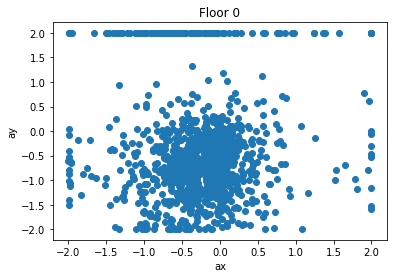

In [25]:
plt.xlabel('ax')
plt.ylabel('ay')
plt.title('Floor 0')
plt.scatter(dataset[dataset['floor']==0]['ax'],dataset[dataset['floor']==0]['ay'])
plt.show()

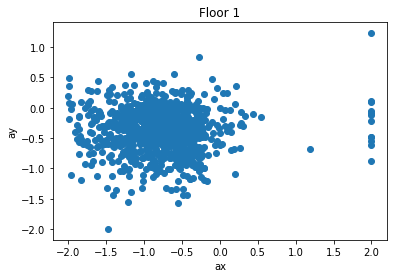

In [26]:
plt.xlabel('ax')
plt.ylabel('ay')
plt.title('Floor 1')
plt.scatter(dataset[dataset['floor']==1]['ax'],dataset[dataset['floor']==1]['ay'])
plt.show()

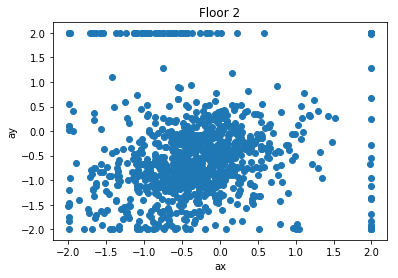

In [27]:
plt.xlabel('ax')
plt.ylabel('ay')
plt.title('Floor 2')
plt.scatter(dataset[dataset['floor']==2]['ax'],dataset[dataset['floor']==2]['ay'])
plt.show()

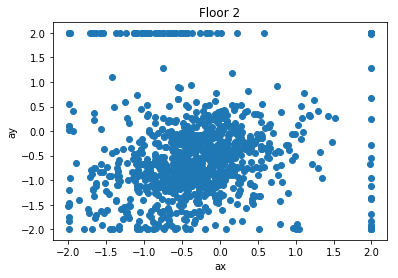

In [28]:
plt.xlabel('ax')
plt.ylabel('ay')
plt.title('Floor 2')
plt.scatter(dataset[dataset['floor']==2]['ax'],dataset[dataset['floor']==2]['ay'])
plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [30]:
corr=dataset.corr()

In [31]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,gx,gy,gz,ax,ay,az,floor
gx,1,-0.15,-0.1,0.012,-0.061,-0.19,0.027
gy,-0.15,1,-0.12,-0.042,0.0014,-0.072,0.0085
gz,-0.1,-0.12,1,0.024,0.024,-0.01,-0.022
ax,0.012,-0.042,0.024,1,0.029,-0.019,-0.036
ay,-0.061,0.0014,0.024,0.029,1,0.055,-0.045
az,-0.19,-0.072,-0.01,-0.019,0.055,1,-0.18
floor,0.027,0.0085,-0.022,-0.036,-0.045,-0.18,1


In [32]:
x=SelectKBest(f_classif,k=3).fit_transform(dataset.iloc[:,:-1],dataset.iloc[:,-1])

In [33]:
x

array([[-0.95239258, -0.87280273,  0.15356445],
       [ 0.13769531,  0.0078125 ,  0.08911133],
       [ 0.109375  , -1.375     , -1.18798828],
       ...,
       [-0.50756836, -0.80517578, -0.33203125],
       [-0.41040039, -0.89135742, -0.140625  ],
       [-0.42358398, -0.89086914, -0.15112305]])

In [34]:
dataset.head(3)

,gx,gy,gz,ax,ay,az,floor
0,-2.854962,3.030534,10.923664,-0.952393,-0.872803,0.153564,0
1,-3.656489,-11.534351,7.038168,0.137695,0.007812,0.089111,0
2,1.526718,1.511450,0.603053,0.109375,-1.375000,-1.187988,0


In [35]:
from sklearn.model_selection import train_test_split , KFold
x_tr,x_ts,y_tr,y_ts=train_test_split(dataset.iloc[:,3:-1],dataset.iloc[:,-1],random_state=0,test_size=0.20)

In [36]:
from sklearn.model_selection import train_test_split , KFold
x_trrn,x_tsrn,y_trrn,y_tsrn=train_test_split(dataset.iloc[:,:-1],dataset.iloc[:,-1],random_state=0,test_size=0.20)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier(n_neighbors=15)

In [39]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [40]:
y_pd=knn.predict(x_ts)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_ts,y_pd)
print(accuracy_score(y_ts,y_pd))
print(classification_report(y_ts,y_pd))

0.5987158908507223
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       219
           1       0.69      0.77      0.73       196
           2       0.52      0.44      0.48       208

   micro avg       0.60      0.60      0.60       623
   macro avg       0.59      0.60      0.60       623
weighted avg       0.59      0.60      0.59       623



In [42]:
from sklearn.svm import SVC

In [43]:
svc=SVC(kernel='rbf')
svc.fit(x_tr,y_tr)
y_pdsvc=svc.predict(x_ts)
print(accuracy_score(y_ts,y_pdsvc))
print(classification_report(y_ts,y_pdsvc))

C:\Users\adars\Documents\anacondda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6260032102728732
              precision    recall  f1-score   support

           0       0.66      0.50      0.57       219
           1       0.73      0.78      0.75       196
           2       0.52      0.62      0.56       208

   micro avg       0.63      0.63      0.63       623
   macro avg       0.64      0.63      0.63       623
weighted avg       0.63      0.63      0.62       623



In [44]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [45]:
ranf=RandomForestClassifier(n_estimators=50,random_state=0)
ranf.fit(x_trrn,y_trrn)
y_predrnf=ranf.predict(x_tsrn)
print(accuracy_score(y_tsrn,y_predrnf))
print(classification_report(y_tsrn,y_predrnf))

0.6629213483146067
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       219
           1       0.82      0.78      0.80       196
           2       0.54      0.57      0.56       208

   micro avg       0.66      0.66      0.66       623
   macro avg       0.67      0.67      0.67       623
weighted avg       0.67      0.66      0.67       623



In [46]:
clf=VotingClassifier(estimators=[('rnf',ranf),('svc',svc),('knn',knn)])

In [47]:
clf.fit(x_tr,y_tr)
y_pdvt=clf.predict(x_ts)
print(accuracy_score(y_ts,y_pdvt))
print(classification_report(y_ts,y_pdvt))

C:\Users\adars\Documents\anacondda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6324237560192616
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       219
           1       0.72      0.76      0.74       196
           2       0.55      0.54      0.55       208

   micro avg       0.63      0.63      0.63       623
   macro avg       0.63      0.64      0.63       623
weighted avg       0.63      0.63      0.63       623



In [48]:
len(dataset)

3114

In [49]:
kf=KFold(n_splits=10,random_state=0)

In [50]:
for train_i , test_i in kf.split(x):
    #FOR KNN
    knn.fit(x[train_i,:],dataset.iloc[train_i,-1])
    y_predictknn=knn.predict(x[test_i,:])
    print(accuracy_score(dataset.iloc[test_i,-1],y_predictknn),train_i[0],train_i[-1],'test',test_i[0],test_i[-1])

0.36538461538461536 312 3113 test 0 311
0.4198717948717949 0 3113 test 312 623
0.4551282051282051 0 3113 test 624 935
0.4519230769230769 0 3113 test 936 1247
0.3086816720257235 0 3113 test 1248 1558
0.2990353697749196 0 3113 test 1559 1869
0.5369774919614148 0 3113 test 1870 2180
0.842443729903537 0 3113 test 2181 2491
0.8263665594855305 0 3113 test 2492 2802
0.41479099678456594 0 2802 test 2803 3113


In [51]:
len(dataset)

3114

In [52]:
kn=list()
svm=list()
rn=list()
vt=list()
rnf=RandomForestClassifier(n_estimators=50,random_state=0)

In [53]:
for train_i , test_i in kf.split(x):
    #FOR KNN
    knn.fit(x[train_i,:],dataset.iloc[train_i,-1])
    y_predictknn=knn.predict(x[test_i,:])
    kn.append(accuracy_score(dataset.iloc[test_i,-1],y_predictknn))
    #FOR SVM
    svc.fit(x[train_i,:],dataset.iloc[train_i,-1])
    y_predictsvc=svc.predict(x[test_i,:])
    svm.append(accuracy_score(dataset.iloc[test_i,-1],y_predictsvc))
    #FOR RNF
    rnf.fit(x[train_i,:],dataset.iloc[train_i,-1])
    y_predictrnf=rnf.predict(x[test_i,:])
    rn.append(accuracy_score(dataset.iloc[test_i,-1],y_predictrnf))
    #FOR VOTING CLASSIFIER
    clf.fit(x[train_i,:],dataset.iloc[train_i,-1])
    y_predictclf=clf.predict(x[test_i,:])
    vt.append(accuracy_score(dataset.iloc[test_i,-1],y_predictclf))
    

C:\Users\adars\Documents\anacondda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adars\Documents\anacondda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adars\Documents\anacondda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\adars\Documents\anacondda\lib\site-packa

In [54]:
import numpy as np

In [55]:
print('KNN ACCURACY:',np.mean(kn))
print('SVC ACCURACY:',np.mean(svm))
print('RNF ACCURACY:',np.mean(rn))
print('CLF ACCURACY:',np.mean(vt))

KNN ACCURACY: 0.49206035122433833
SVC ACCURACY: 0.41248454118229044
RNF ACCURACY: 0.49334858603347354
CLF ACCURACY: 0.4676683980542502


In [ ]:
inputs=list()
inputs.append(float(input('Enter the orientation along X axis:')))
inputs.append(float(input('Enter the orientation along Y axis:')))
inputs.append(float(input('Enter the orientation along Z axis:')))
inputs.append(float(input('Enter the acceleration along X axis:')))
inputs.append(float(input('Enter the acceleration along Y axis:')))
inputs.append(float(input('Enter the acceleration along Z axis:')))
youtput=ranf.predict([inputs])
print('The Floor Type is: ',lb.inverse_transform(youtput)[0])